# <center> Music data: listeners, artists and songs </center>

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import ipywidgets as wg
from IPython.display import display

In [2]:
# Figures in the notebook with more quality.
%config InlineBackend.figure_format = 'svg' 

In [3]:
# RGB color codes
wg.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

## Listeners data

According to data from Spotify, based on a sample of **five million** subscribers:
1. Male users listened to 
    - 94.2 percent male artists
    - 3.3 percent female artists
    - 2.5 percent mixed groups
2. Female users listened to 
    - 55 percent male artists
    - 30.8 percent female artists
    - 14.2 percent mixed groups. 

Let's see this information in a graphic way. To do this, we will use the following code:

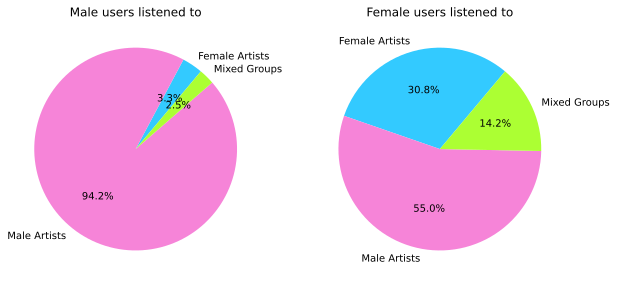

In [4]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize=(10,10))

labels = 'Female Artists', 'Male Artists', 'Mixed Groups'

# Graphic for male
f1 = 3.3 # 3.3 percent female artists
f2 = 94.2 # 94.2 percent male artists
f3 = 2.5 # 2.5 percent mixed groups
sizes = [f1, f2, f3]

# Graphic for female
f4 = 30.8 # 3.3 percent female artists
f5 = 55 # 94.2 percent male artists
f6 = 14.2 # 2.5 percent mixed groups
sizes2 = [f4, f5, f6]

# Set the colors for the pie charts
colors = ['#33CAFF','#F684D8', '#ACFF33']

# Plot the two pie charts
axs1.pie(sizes, labels=labels, colors = colors, autopct='%2.1f%%', startangle=50)
axs1.set_title("Male users listened to")

axs2.pie(sizes2, labels=labels, colors = colors,  autopct='%2.1f%%', startangle=50)
axs2.set_title("Female users listened to")


pass

For more information, click [here](https://www.popdust.com/female-artists-equality-2639071012.html)


---

## Artists with most monthly listeners on Spotify 2021

Let's see a list of the TOP 10 of the artists with the most monthly Spotify listeners in 2021.

In [5]:
# TOP, Artits and listeners
listeners_data = [{"top": "TOP 1: ", "name": "Justin Bieber", "listeners": 84.18},
                  {"top": "TOP 2: ","name": "Ed Sheeran","listeners": 74.68},
                  {"top": "TOP 3: ","name": "The Weeknd", "listeners": 69.37}]

listeners_data2 = [{"top": "TOP 4: ","name": "Dua Lipa", "listeners": 67.26},
                  {"top": "TOP 5: ","name": "Coldplay", "listeners": 61.93}, 
                  {"top": "TOP 6: ","name": "Doja Cat", "listeners": 61.61}, 
                  {"top": "TOP 7: ","name": "Lil Nas X", "listeners": 61.13}, 
                  {"top": "TOP 8: ","name": "Drake", "listeners": 60.76}, 
                  {"top": "TOP 9: ","name": "The Kid Laroi", "listeners": 58.35}, 
                  {"top": "TOP 10: ","name": "J Balvin", "listeners": 57.16}]

def artists_listeners(data):
    
    for dictionary in data:
        
        top = dictionary["top"]           
        name = dictionary["name"]
        listeners = dictionary["listeners"]
        fstring = f"{top}{name} has {listeners} million monthly listeners."
    
        print(fstring)

        
artists_listeners(listeners_data)
print("------------------------------------------------------------")
artists_listeners(listeners_data2)

TOP 1: Justin Bieber has 84.18 million monthly listeners.
TOP 2: Ed Sheeran has 74.68 million monthly listeners.
TOP 3: The Weeknd has 69.37 million monthly listeners.
------------------------------------------------------------
TOP 4: Dua Lipa has 67.26 million monthly listeners.
TOP 5: Coldplay has 61.93 million monthly listeners.
TOP 6: Doja Cat has 61.61 million monthly listeners.
TOP 7: Lil Nas X has 61.13 million monthly listeners.
TOP 8: Drake has 60.76 million monthly listeners.
TOP 9: The Kid Laroi has 58.35 million monthly listeners.
TOP 10: J Balvin has 57.16 million monthly listeners.


**Conclusion**:  <br />  _Justin Bieber_ has the most monthly listeners on Spotify for a male artist, and _Dua Lipa_ has the most monthly listeners on Spotify for a female artist.

---

## Followers of the five artists with most monthly listeners on Spotify 2021

Let's see how many followers the five artists with the most monthly listeners have on Spotify in 2021

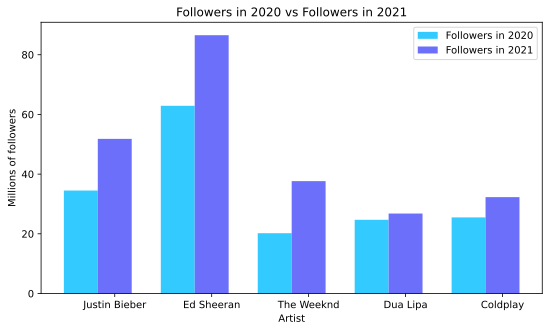

In [6]:
fig, ax = plt.subplots(figsize=(9,5))

followers_2020 = [34.50, 62.89, 20.20, 24.7, 25.50]
followers_2021 = [51.81, 86.54, 37.66, 26.8, 32.29]
 
number_groups = len(followers_2020)
index_bars = np.arange(number_groups)
width_bars =0.35

# Colors for the graph
colors1 = ['#33CAFF']
colors2 = ['#6C6FFA']

plt.bar(index_bars, followers_2020, color=colors1, width=width_bars, label='Followers in 2020')
plt.bar(index_bars + width_bars, followers_2021,color=colors2, width=width_bars, label='Followers in 2021')
plt.legend(loc='best')

# X axis indicators
plt.xticks(index_bars + width_bars, ('Justin Bieber', 'Ed Sheeran', 'The Weeknd', 'Dua Lipa', 'Coldplay'))
 
plt.title('Followers in 2020 vs Followers in 2021')
plt.ylabel('Millions of followers')
plt.xlabel('Artist')

 
plt.show()

**Conclusion**:  <br />  All artists have increased their number of followers in 2021 compared to 2020.

---

## Popularity of a Dua Lipa song vs a Coldplay song in the first three hours after its release

The equation to measure the popularity of a Dua Lipa song is $$(t^2+15.5)*exp(t^2)$$


The equation to measure the popularity of a Coldplay song is $$(t^2+5)*exp(t^2*0.85)*1.5$$

Now we are going to show graphically the evolution of the popularity of a newly released song by both artists in the three first hours.

In [7]:
def f_dualipa(t):

    y_dualipa = (t**2+15.5)*(t**2) # Equation for Dua Lipa
    
    return y_dualipa

In [8]:
t = np.linspace(0, 3, 80)
y_dualipa = f_dualipa(t)

In [9]:
def f_coldplay(t):

    y_coldplay = (t**2+5)*(t**2*0.85)*1.5 # Equation for Coldplay
    
    return y_coldplay

y_coldplay = f_coldplay(t)

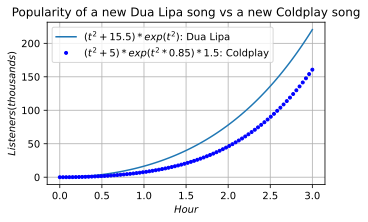

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(5,3))

plt.plot(t,y_dualipa)
plt.plot(t,y_coldplay,'b.')

plt.title("Popularity of a new Dua Lipa song vs a new Coldplay song")
plt.xlabel("$  Hour $")
plt.ylabel("$ Listeners (thousands) $")
plt.grid()

plt.legend(["$(t^2+15.5)*exp(t^2)$: Dua Lipa", "$(t^2+5)*exp(t^2*0.85)*1.5$: Coldplay"])


plt.show()

As we can see, the number of listeners is similar during the first half hour. Then the number of listeners grows fast in both, but more for the Dua Lipa song than the Coldplay song. Therefore, Dua Lipa's song is more popular than Coldplay's song in the first three hours after its release.

---

## Comparison of four songs released the same day

Drake, Ed Sheeran, Coldplay, and Justin Bieber release a song on the same day. Let's see who has the most listeners at the end of the day.

We display information in three different ways:


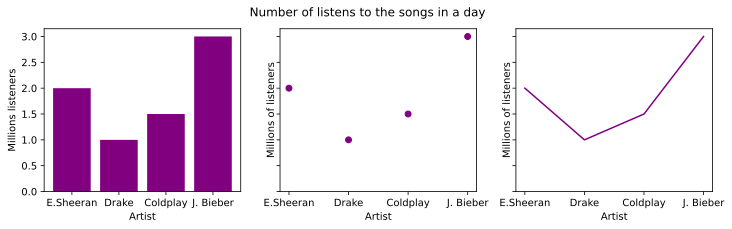

In [11]:
data = {'E.Sheeran': 2, 'Drake': 1, 'Coldplay': 1.5, 'J. Bieber': 3}
names = list(data.keys())
values = list(data.values())

color = ['purple']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

# We display information in three different ways
ax1.bar(names, values, color=color)
ax2.scatter(names, values, color = color)
ax3.plot(names, values, color='purple')
fig.suptitle('Number of listens to the songs in a day')

ax1.set_ylabel('Millions listeners')
ax1.set_xlabel('Artist')

ax2.set_ylabel('Millions of listeners')
ax2.set_xlabel('Artist')

ax3.set_ylabel('Millions of listeners')
ax3.set_xlabel('Artist')

print("We display information in three different ways:")

pass

As we can see, at the end of the day, the song that has tended the most listeners has been Justin Bieber's, then Ed Sheeran's, then Coldplay's and finally, Drake's. This is directly related to the number of monthly listeners and followers each artist has.

---

## Study of hours and artists that 50 random people listen in a day

Now we are going to do a study of 50 random people. We will get their age, gender, the number of hours they listen to music per day, and the number of different artists they listen to per day.

- The results of the study are shown in this 3D graph:


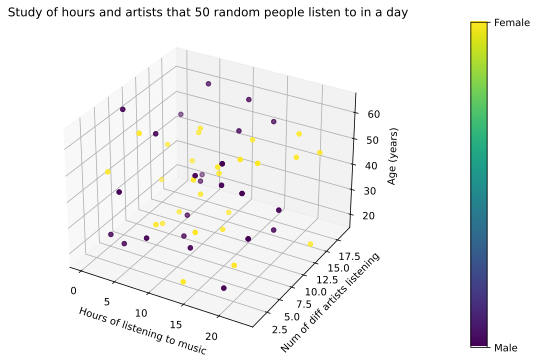

In [12]:
# Number of people for the study
np.random.seed(50)

ages = np.random.randint(low = 18, high = 65, size=50)
hours_music = np.random.randint(0, 24, 50)
number_diff_artist = np.random.randint(1, 20, 50)

# 0 for male, 1 for female
gender = np.random.choice([0, 1], 50)

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = hours_music, ys = number_diff_artist, zs = ages, c=gender)
ax.set_title("Study of hours and artists that 50 random people listen to in a day")

# Axis
ax.set_xlabel("Hours of listening to music")
ax.set_ylabel("Num of diff artists listening")
ax.set_zlabel("Age (years)")

scat_plot = ax.scatter(xs = hours_music, ys = number_diff_artist, zs = ages, c=gender)
cb = plt.colorbar(scat_plot, pad=0.2)
cb.set_ticks([0,1])
cb.set_ticklabels(["Male", "Female"])


print("- The results of the study are shown in this 3D graph:")

plt.show()

---

## The most famous reggaeton artist in the world

In this section we are going to reveal who is the most famous reggaeton artist in the world and some information about him.

In [20]:
# Imagen
file = open("imagen/daddy.jpg", "rb")
image = file.read()
image = wg.Image(
    value=image,
    format='png',
    width=300,
    height=400,
)

# Button
button2 = wg.Button(disabled=False, description="Click me!")

def action_of_the_button(b): #When one clicks the button the instance of the Button is passd to the function
    print("Daddy Yankee!")
    display(image)
    b.description = "Disabled"
    b.disabled = True

button2.style.button_color = 'yellow'
button2.on_click(action_of_the_button)

print("To find out who is the most famous reggaeton artist in the world, click on the button!")
button2

To find out who is the most famous reggaeton artist in the world, click on the button!


Button(description='Click me!', style=ButtonStyle(button_color='yellow'))

**Let's show some information about this artist**

In [21]:
# Class with information about Daddy Yankee
class daddy_yankee:

    def __init__(self, name):
        self.name = name    
    
    def real_name(self, real_name):
        self.real_name = real_name

    def age(age):
        print("- 45 years old")

    def birth(birth):
        print("- Puerto Rico")
        
    def sons(self, number):
        self.number = number
        

In [22]:
a = daddy_yankee("Daddy Yankee")
b = daddy_yankee("Ramón Luis Ayala Rodríguez")
s = daddy_yankee("3 sons")

print(f"{a.name}: ")
print(f"- His real name is {b.name} ")
a.age()
a.birth()
print(f"- He has {s.name} ")


Daddy Yankee: 
- His real name is Ramón Luis Ayala Rodríguez 
- 45 years old
- Puerto Rico
- He has 3 sons 


---

## Personal data for future studies

Finally, you can fill in the form with your personal data for future studies we do on music.

In [23]:
# Tab
tab_contents = ['Date', 'Name', 'Gender', 'P3', 'P4']
children = [wg.DatePicker(description='Date',disabled=False), wg.Text(description='Name'), wg.RadioButtons(
    options=['Male', 'Female', 'Other'],description='Gender:',disabled=False), wg.ToggleButtons(
    options=['0-25', '26-64', '65+'],description='Age:',disabled=False,button_style='',
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']), wg.IntSlider(
    value=7,min=0,max=24,step=1,description='Hours of listening to music:',disabled=False,continuous_update=False,
    orientation='horizontal',readout=True,readout_format='d'), 
    wg.Text(description='Most listened music genre')]

tab = wg.Tab()
tab.children = children

# tabs title
tab.set_title(0, 'Date')
tab.set_title(1, 'Name')
tab.set_title(2, 'Gender')
tab.set_title(3, 'Age')
tab.set_title(4, 'Hours of listening to music')
tab.set_title(5, 'Most listened music genre')

tab

# Loading
float_progress = wg.FloatProgress(
    value=0,
    min=0,
    max=10.0,
    description='Loading data:',
    bar_style='info',
    style={'bar_color': '#20E8A5'},
    orientation='horizontal'
)

play = wg.Play(
    value=0,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
wg.jslink((play, 'value'), (float_progress, 'value'))
box = wg.HBox([play, float_progress])

# CheckBox
check = wg.Checkbox(
    value=False,
    description='Accept the Data Processing',
    disabled=False,
    indent=False
)

# Sen button
button3 = wg.Button(disabled=False, description="Send")

def action_of_the_button(b): #When one clicks the button the instance of the Button is passd to the function
    print("Thanks for helping!")
    b.description = "Disabled"
    b.disabled = True
    
button3.style.button_color = '#20E8A5'
    
button3.on_click(action_of_the_button)

display(tab)
print("Click play to load the data:")
display(box)
display(check)
display(button3)

Click play to load the data:


Checkbox(value=False, description='Accept the Data Processing', indent=False)

Button(description='Send', style=ButtonStyle(button_color='#20E8A5'))

---